<a href="https://colab.research.google.com/github/Kabongosalomon/Word-Embedding-Investigation/blob/Dev-Update/An%20empirical%20investigation%20into%20the%20properties%20of%20standard%20word%20embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/Kabongosalomon/Data-Science-With-Jeff-Sander/master/aims-za-logo.jpg" width="100" alt="cognitiveclass.ai logo" />





# IMdb Sentiment Analysis Task

##Importing usefull packages 

In [2]:
# Import packages
import tensorflow as tf
# tf.enable_eager_execution()

from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import losses
from keras import metrics
from keras import optimizers
from keras.layers import Dropout

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Downgrate numpy to fix a problem
!pip install numpy==1.16.2
import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt

import os

import numpy as np

import string

!pip install ipdb
import ipdb # deb

from gensim.models.keyedvectors import KeyedVectors

# Spliting data
from sklearn.model_selection import train_test_split

from sklearn import metrics # For RUC

from nltk.stem import PorterStemmer

import tensorflow_hub as hub
import pandas as pd
import re
import seaborn as sns

from google.colab import files

from IPython import display

import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 17.3MB 3.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


1.16.4
  Stored in directory: /root/.cache/pip/wheels/59/24/91/695211bd228d40fb22dff0ce3f05ba41ab724ab771736233f3
Successfully built ipdb


W0603 22:34:10.027212 140598568068992 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [0]:
link = "https://drive.google.com/file/d/1smGRs2g2HoI6VSvonoZmWKzXOP6uPUaW/view?usp=sharing"

_, id_t = link.split('d/')

id = id_t.split('/')[0]
print (id) # Verify that you have everything after '='

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = id
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

1smGRs2g2HoI6VSvonoZmWKzXOP6uPUaW


## Loading data (Manual)

If you want to manually load the data from a tex file 

In [0]:
link = "https://drive.google.com/file/d/1smGRs2g2HoI6VSvonoZmWKzXOP6uPUaW/view?usp=sharing"

_, id_t = link.split('d/')

id = id_t.split('/')[0]
print (id) # Verify that you have everything after '='

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = id
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

In [0]:
!ls

aclImdb.zip  crawl-300d-2M-subword.bin	crawl-300d-2M-subword.zip
adc.json     crawl-300d-2M-subword.vec	sample_data


In [0]:
!unzip -qq aclImdb.zip

In [0]:
!ls

In [0]:
# imdb_dir = './data/aclImdb'
imdb_dir = './aclImdb'

# Reading in the training folder
train_dir = os.path.join(imdb_dir, 'train')
texts_tr_ = []
labels_tr = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts_tr_.append(f.read())
            f.close()
            if label_type == 'neg':
                labels_tr.append(0)
            else:
                labels_tr.append(1)

# Reading in the testing folder
train_dir = os.path.join(imdb_dir, 'test')
texts_tst_ = []
labels_tst = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts_tst_.append(f.read())
            f.close()
            if label_type == 'neg':
                labels_tst.append(0)
            else:
                labels_tst.append(1)

In [0]:
# Make sure that we have only 1 and 2 in the label 
(np.unique(labels_tr), np.unique(labels_tst))

In [0]:
len(labels_tr)

In [0]:
# Looking at 2 examples
print(texts_tr_[1])
print(labels_tr[1])

print(texts_tst_[-10])
print(labels_tst[-10])

## Load pre-trained  embedding

In [3]:
######################################################################################################
########################################## Fasttext###################################################

# 2 million word vectors trained with subword information on Common Crawl (600B tokens).
# link = "https://drive.google.com/file/d/1Z_-E-gvsBP5BnJFKvX4sVnBVchdoUwsx/view?usp=sharing"

# 1 million word vectors trained with subword infomation on Wikipedia 2017, 
# UMBC webbase corpus and statmt.org news dataset (16B tokens).
link = "https://drive.google.com/file/d/1lZhw_9cXME_eYbl1IwrMTyTEn6ONozgI/view?usp=sharing"

# crawl-300d-2M.vec.zip: 2 million word vectors trained on Common Crawl (600B tokens).
# link = "https://drive.google.com/file/d/1jkJmSpRVZr_V2vGGkLmoEio6eY2Q2el-/view?usp=sharing"
######################################################################################################
######################################### Word2vec ###################################################

# Developed by Tomas Mikolov at Google in 2013. Word2vec (https://code.google.com/archive/p/word2vec)
# dimensions capture specific semantic properties
# link = "https://drive.google.com/file/d/13NmrtF-HoGmdv_m3Ld4eGVTbIekOcNi_/view?usp=sharing"
######################################################################################################
########################################## Glove #####################################################

# Go to https://nlp.stanford.edu/projects/glove, and download the precomputed embeddings
# from 2014 English Wikipedia. It’s an 822 MB zip file called glove.6B.zip, 
# containing 100-dimensional embedding vectors for 400,000 words (or nonword tokens). Unzip it.
# link = "https://drive.google.com/file/d/1qlkC4-gpOhJVVvja8NEnnYPJFFzUu1CW/view?usp=sharing"
######################################################################################################



######################################################################################################

_, id_t = link.split('d/')


id = id_t.split('/')[0]
print (id) # Verify that you have everything after '='

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = id
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

1lZhw_9cXME_eYbl1IwrMTyTEn6ONozgI
     |████████████████████████████████| 993kB 3.4MB/s 


In [4]:
!ls

adc.json  sample_data  wiki-news-300d-1M-subword.vec.zip


In [5]:
# !unzip crawl-300d-2M.vec.zip
# !unzip crawl-300d-2M-subword.zip
!unzip wiki-news-300d-1M-subword.vec.zip
# !unzip glove.840B.300d.zip

Archive:  wiki-news-300d-1M-subword.vec.zip
  inflating: wiki-news-300d-1M-subword.vec  


In [0]:
# !rm crawl-300d-2M.vec.zip

In [7]:
!ls

adc.json     wiki-news-300d-1M-subword.vec
sample_data  wiki-news-300d-1M-subword.vec.zip


In [8]:
# gensim_w2v = KeyedVectors.load_word2vec_format('./crawl-300d-2M.vec')
gensim_w2v = KeyedVectors.load_word2vec_format('./wiki-news-300d-1M-subword.vec')
# gensim_w2v = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
# gensim_w2v = KeyedVectors.load_word2vec_format('./crawl-300d-2M-subword.bin')

W0603 22:36:19.038120 140598568068992 smart_open_lib.py:385] this function is deprecated, use smart_open.open instead


In [0]:
gensim_w2v['I'].shape

(300,)

In [0]:
gensim_w2v["Hello"]

array([-0.0038,  0.0601,  0.0188,  0.0288,  0.0031, -0.0114,  0.015 ,
       -0.0148, -0.004 , -0.0307,  0.015 ,  0.0423,  0.0133,  0.0243,
       -0.0038,  0.0272,  0.0356, -0.0024,  0.0257, -0.0343, -0.008 ,
        0.0032,  0.0065,  0.0043,  0.0186,  0.0173,  0.0047,  0.0351,
        0.0249, -0.0264, -0.0262,  0.0177,  0.0399,  0.0346, -0.0193,
        0.0078,  0.0046, -0.0115,  0.0021, -0.0317, -0.0078, -0.0675,
       -0.0009, -0.0058,  0.005 ,  0.0385,  0.0162, -0.0008, -0.0287,
        0.0565,  0.0094, -0.0034,  0.052 , -0.0209,  0.0455,  0.0119,
        0.008 , -0.0217, -0.0714, -0.0148,  0.0285, -0.0107, -0.0339,
        0.001 , -0.0323,  0.0292,  0.0139,  0.0141,  0.012 ,  0.0052,
       -0.0153,  0.0006,  0.0195, -0.0176,  0.0104, -0.017 ,  0.014 ,
       -0.0169,  0.0068,  0.0106, -0.0219, -0.025 ,  0.029 , -0.0596,
       -0.0245, -0.015 , -0.0285, -0.0399,  0.0048,  0.0084, -0.005 ,
        0.0104, -0.093 , -0.0481,  0.0094,  0.0111,  0.0026,  0.0017,
       -0.0146, -0.0

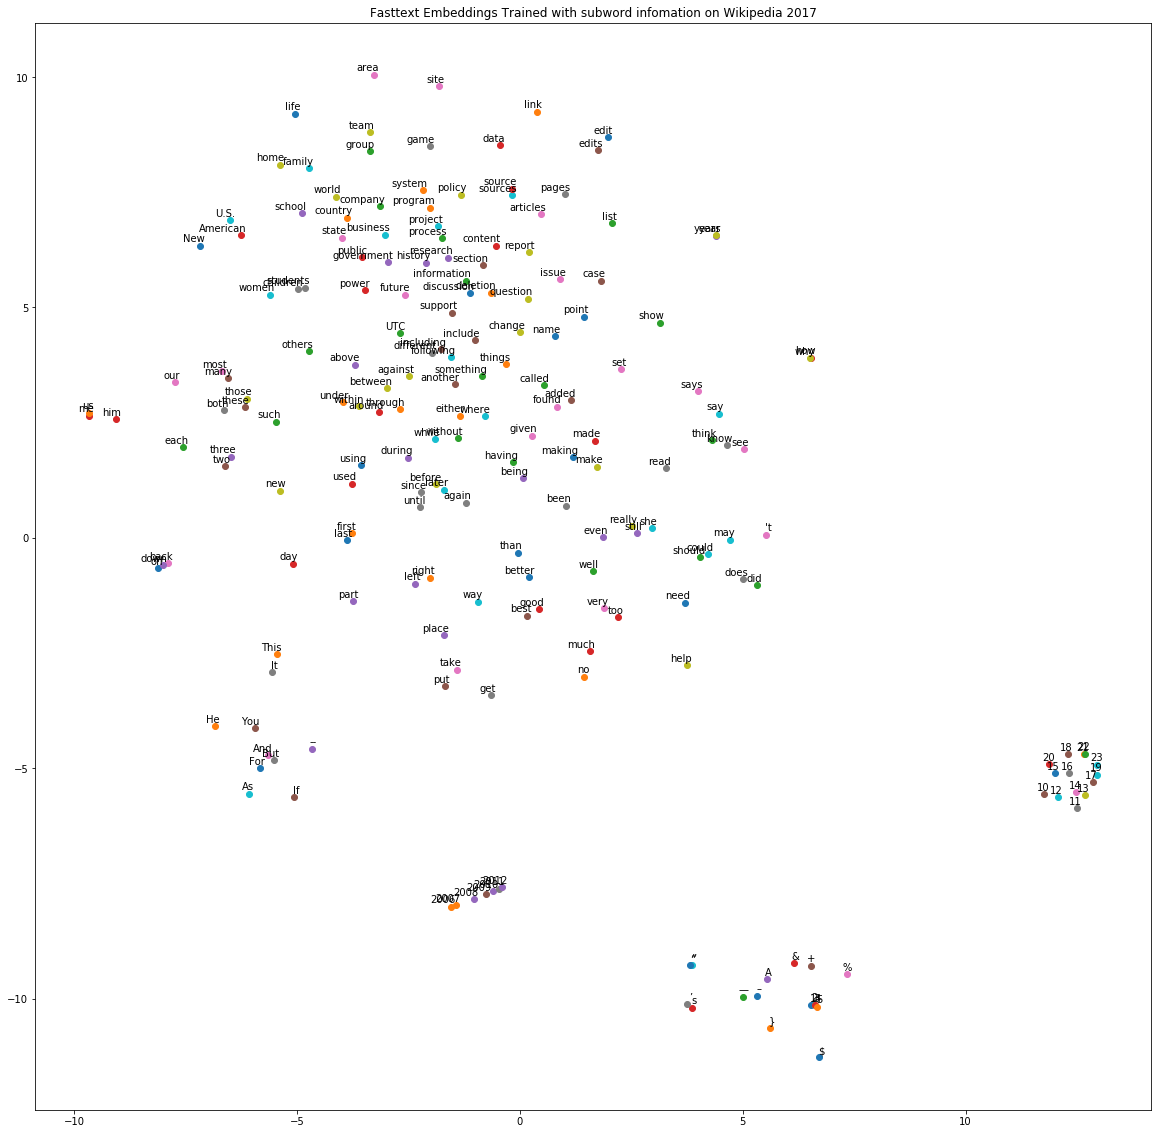

In [0]:
from sklearn.manifold import TSNE
from matplotlib import pylab

words = [word for word in gensim_w2v.index2word[100:300]]
embeddings = [gensim_w2v[word] for word in words]
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

pylab.figure(figsize=(20, 20))
for i, label in enumerate(words):
  x, y = words_embedded[i, :]
  pylab.scatter(x, y)
  pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom')
  
pylab.title('Fasttext Embeddings Trained with subword infomation on Wikipedia 2017')
pylab.savefig("Fasttest300-dembeddings.eps", format='eps', dpi=1200)
# pylab.axes(False)
pylab.show()

In [0]:
!ls

 adc.json			  sample_data
'Fasttest 300-d embeddings'	  wiki-news-300d-1M-subword.vec
'Fasttest 300-d embeddings.eps'   wiki-news-300d-1M-subword.vec.zip
 Fasttest300-dembeddings.eps


In [0]:
files.download("Fasttest300-dembeddings.eps")

## Approach (TF-Hub)

In [0]:
# Install TF-Hub.
!pip install tensorflow-hub
!pip install seaborn

# Install Ipdb
!pip install ipdb

from tensorflow.python.data import Dataset

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

### Getting started

#### Data
We will try to solve the [Large Movie Review Dataset v1.0](http://ai.stanford.edu/~amaas/data/sentiment/) task from Mass et al. The dataset consists of IMDB movie reviews labeled by positivity from 1 to 10. The task is to label the reviews as **negative** or **positive**.

In [0]:
# Load all files from a directory in a DataFrame.
def load_directory_data(directory):
  data = {}
  data["sentence"] = []
#   data["sentiment"] = []
  for file_path in os.listdir(directory):
    with tf.gfile.GFile(os.path.join(directory, file_path), "r") as f:
      data["sentence"].append(f.read())
#       data["sentiment"].append(re.match("\d+_(\d+)\.txt", file_path).group(1))#; ipdb.set_trace()
  return pd.DataFrame.from_dict(data)

# Merge positive and negative examples, add a polarity column and shuffle.
def load_dataset(directory):
  pos_df = load_directory_data(os.path.join(directory, "pos"))
  neg_df = load_directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0
  return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

# Download and process the dataset files.
def download_and_load_datasets(force_download=False):
  dataset = tf.keras.utils.get_file(
      fname="aclImdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)
  
  train_df = load_dataset(os.path.join(os.path.dirname(dataset), 
                                       "aclImdb", "train"))
  test_df = load_dataset(os.path.join(os.path.dirname(dataset), 
                                      "aclImdb", "test"))
  
  return train_df, test_df

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

train_df, test_df = download_and_load_datasets()

84131840/84125825 [==============================] - 8s 0us/step


In [0]:
# pd.set_option('display.max_colwidth', 200)

In [0]:
train_df.head(10)

,sentence,sentiment
0,"First of all, I was expecting ""Caged Heat"" to ...",0
1,"This was my first, and probably the last Angel...",0
2,This HAS to be the worst movie I've ever attem...,0
3,"The first point that calls the attention in ""F...",0
4,"I found this movie to be very funny, I loved h...",1
5,"Yes it was a little low budget, but this movie...",1
6,This is a very enjoyable film with excellent a...,1
7,"Holes (2003, Dir Andrew Davis) <br /><br />Whe...",1
8,A great and truly independent film that hit mo...,1
9,"""Happy Go Lovely"" has only two things going fo...",0


In [0]:
test_df.tail(10)

,sentence,sentiment
24990,The most accurate description of how Billy Cry...,0
24991,"Now, I've seen many many B-grade films in my 1...",1
24992,"While I hold its predecessor, ""Fast Times At R...",1
24993,I vaguely remember this film. I do remember it...,0
24994,"""Showtime"" is a funny film starring funnymen R...",1
24995,I found it hard to care about these characters...,0
24996,Viewed this GREAT Classic film of Greta Garbo ...,1
24997,About 5 minutes into the movie you're thrown i...,0
24998,I remember seeing this film in the theater in ...,1
24999,"Okay,. so I went into this loving RuPaul. I st...",0


### Model
#### Input functions

[Estimator framework](https://www.tensorflow.org/get_started/premade_estimators#overview_of_programming_with_estimators) provides [input functions](https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/pandas_input_fn) that wrap Pandas dataframes.

In [0]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["sentiment"], num_epochs=None, shuffle=True)
# .head(10)
# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["sentiment"], shuffle=False)
# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
    test_df, test_df["sentiment"], shuffle=False)

### Feature columns

TF-Hub provides a [feature column](https://github.com/tensorflow/hub/blob/master/docs/api_docs/python/hub/text_embedding_column.md) that applies a module on the given text feature and passes further the outputs of the module. In this tutorial we will be using the [nnlm-en-dim128 module](https://tfhub.dev/google/nnlm-en-dim128/1). For the purpose of this tutorial, the most important facts are:

* The module takes **a batch of sentences in a 1-D tensor of strings** as input.
* The module is responsible for **preprocessing of sentences** (e.g. removal of punctuation and splitting on spaces).
* The module works with any input (e.g. **nnlm-en-dim128** hashes words not present in vocabulary into ~20.000 buckets).

In [0]:
embedded_text_feature_column = hub.text_embedding_column(
    key="sentence", 
    module_spec="https://tfhub.dev/google/Wiki-words-250-with-normalization/1", trainable=True) # adding trainable to (True) 

### Estimator

For classification we can use a [DNN Classifier](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier) (note further remarks about different modelling of the label function at the end of the tutorial).

In [0]:
estimator = tf.estimator.DNNClassifier(
    hidden_units=[512, 511, 512],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.003))

### Training

Train the estimator for a reasonable amount of steps.

In [0]:
# Training for 20,000 steps means 128,000 training examples with the default
# batch size. This is roughly equivalent to 100 epochs since the training dataset
# contains 25,000 examples.
estimator.train(input_fn=train_input_fn, steps=20000);

In [0]:
# 100*1000/5

20000.0

### Prediction

Run predictions for both training and test set.

In [0]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

print(f"Training set accuracy: {train_eval_result['accuracy']*100:.1f} %")
print(f"Test set accuracy: {test_eval_result['accuracy']*100:.1f} %")

Training set accuracy: 100.0 %
Test set accuracy: 86.6 %


In [0]:
print("Training set metrics:")
for m in train_eval_result:
  print(m, train_eval_result[m])
  
print("\n-----------------------------------\n")

print("Testing set metrics:")
for m in test_eval_result:
  print(m, test_eval_result[m])
# print("---")

Training set metrics:
accuracy 1.0
accuracy_baseline 0.5
auc 1.0
auc_precision_recall 1.0
average_loss 4.2935313e-05
label/mean 0.5
loss 0.005476443
precision 1.0
prediction/mean 0.50000554
recall 1.0
global_step 20000

-----------------------------------

Testing set metrics:
accuracy 0.86576
accuracy_baseline 0.5
auc 0.90123457
auc_precision_recall 0.91897255
average_loss 1.144381
label/mean 0.5
loss 145.96698
precision 0.8721309
prediction/mean 0.4916909
recall 0.8572
global_step 20000


### Evaluation


<function matplotlib.pyplot.show>

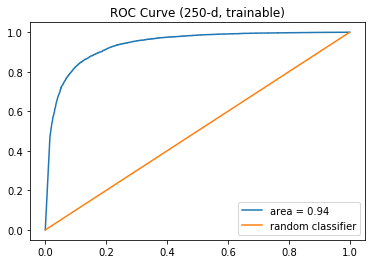

In [0]:
from sklearn.metrics import auc
validation_probabilities = estimator.predict(input_fn=predict_test_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    test_df["sentiment"], validation_probabilities)


roc_auc = auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], label="random classifier")
plt.title("ROC Curve (250-d, trainable)")
plt.legend(loc=0)
plt.savefig("ROC curve (250).eps", format='eps', dpi=1200)
plt.show

###Confusion matrix

We can visually check the confusion matrix to understand the distribution of misclassifications.

[]

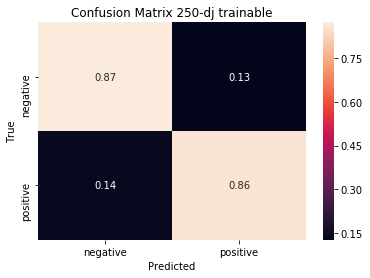

In [0]:
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    "negative", "positive"
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(test_df["sentiment"], 
                           get_predictions(estimator, predict_test_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");
plt.title("Confusion Matrix 250-dj trainable")
plt.savefig("Confusion matrix (250).eps", format='eps', dpi=1000)
plt.plot()

In [0]:
!ls

'Confusion matrix (250).eps'  'ROC curve (250).png'
'ROC curve (250).eps'	       sample_data


In [0]:
# files.download("Confusion matrix (250).eps")
files.download("ROC curve (250).eps")
# files.download("ROC curve (Bow+Fast_text).eps")

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels
  
def preprocess_targets(dataframe_):
  """Prepares target features (i.e., labels) from California housing data set.

  Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  # Create a boolean categorical feature representing whether the
  # median_house_value is above a set threshold.
  output_targets["sentiment"] = (dataframe_["sentiment"]).astype(float)
  return output_targets

In [0]:
def train_DNN_classifier_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a neural network classifier model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    my_optimizer: An instance of `tf.train.Optimizer`, the optimizer to use.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    hidden_units: A `list` of int values, specifying the number of neurons in each layer.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A tuple `(estimator, training_losses, validation_losses)`:
      estimator: the trained `DNNRegressor` object.
      training_losses: a `list` containing the training loss values taken during training.
      validation_losses: a `list` containing the validation loss values taken during training.
  """

  periods = 10
  steps_per_period = steps / periods
  
  estimator = tf.estimator.DNNClassifier(
    hidden_units=[512],
    feature_columns=[embedded_text_feature_column],
    n_classes=2,
    optimizer=tf.train.AdagradOptimizer(learning_rate=learning_rate))
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["sentiment"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["sentiment"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["sentiment"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss (on training data):")
  
  training_log_losses = []
  validation_log_losses = []
  
  training_acc = []
  validation_acc = []

  for period in range (0, periods):
    # Train the model, starting from the prior state.
    estimator.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    
    # Take a break and compute predictions.    
    training_probabilities_acc = estimator.predict(input_fn=predict_training_input_fn)
    training_probabilities_acc = np.array([item['probabilities'][1] for item in training_probabilities_acc])
    
    validation_probabilities_acc = estimator.predict(input_fn=predict_validation_input_fn)
    validation_probabilities_acc = np.array([item['probabilities'][1] for item in validation_probabilities_acc])

    
    training_acc_ = metrics.accuracy_score(training_targets["sentiment"], training_probabilities_acc.round())
    validation_acc_ = metrics.accuracy_score(validation_targets["sentiment"], validation_probabilities_acc.round())
    
    # Take a break and compute predictions.    
    training_probabilities = estimator.predict(input_fn=predict_training_input_fn)
    training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
    validation_probabilities = estimator.predict(input_fn=predict_validation_input_fn)
    validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
    training_log_loss = metrics.log_loss(training_targets, training_probabilities)
    validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_log_loss))
    # Add the loss metrics from this period to our list.
    training_log_losses.append(training_log_loss)
    validation_log_losses.append(validation_log_loss)
    
    training_acc.append(training_acc_)
    validation_acc.append(validation_acc_)
    
  print("Model training finished.")
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods (250-dimension Embeddings)")
  plt.tight_layout()
  plt.plot(training_log_losses, label="training")
  plt.plot(validation_log_losses, label="validation")
  plt.legend()
  plt.show()
  
  # Output a graph of loss metrics over periods.
  plt.ylabel("Accuracy")
  plt.xlabel("Periods")
  plt.title("Accuracy vs. Periods (250-dimension Embeddings)")
  plt.tight_layout()
  plt.plot(training_acc, label="training")
  plt.plot(validation_acc, label="validation")
  plt.legend()
  plt.show()
  
  validation_probabilities_f = estimator.predict(input_fn=predict_test_input_fn)
  # Get just the probabilities for the positive class.
  validation_probabilities_f = np.array([item['probabilities'][1] for item in validation_probabilities_f])

  false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
      test_df["sentiment"], validation_probabilities_f)
  plt.plot(false_positive_rate, true_positive_rate, label="our model")
  plt.plot([0, 1], [0, 1], label="random classifier")
  _ = plt.legend(loc=0)
  plt.title("ROC curve (250-dimension Embeddings)")
  plt.show()
  
  train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
  test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
  
  print(f"Training set accuracy: {train_eval_result['accuracy']*100:.1f} %")
  print(f"Test set accuracy: {test_eval_result['accuracy']*100:.1f} %")

  return estimator

In [0]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = train_df.head(20000)
training_targets = preprocess_targets(train_df.head(20000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = train_df.tail(5000)
validation_targets = preprocess_targets(train_df.tail(5000))

Training model...
LogLoss (on training data):
  period 00 : 0.61
  period 01 : 0.60
  period 02 : 0.58
  period 03 : 0.56
  period 04 : 0.55
  period 05 : 0.54
  period 06 : 0.56
  period 07 : 0.53
  period 08 : 0.52
  period 09 : 0.52
Model training finished.


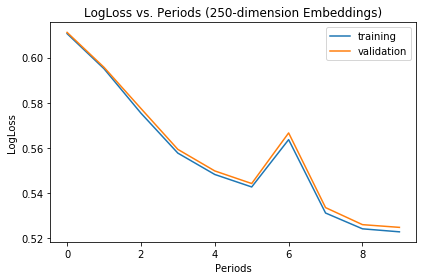

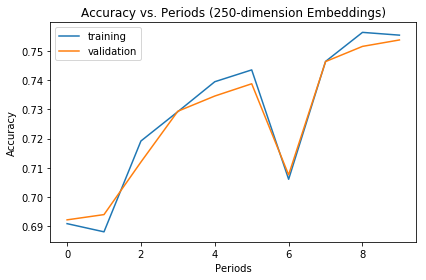

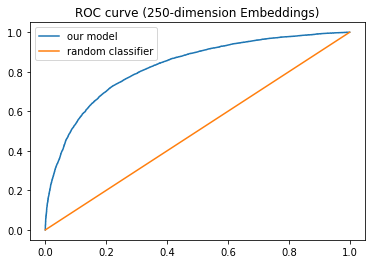

Training set accuracy: 75.5 %
Test set accuracy: 74.6 %


In [0]:
DNN_classifie = train_DNN_classifier_model(
    learning_rate=0.003,
    steps=1000,
    batch_size=32,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

## My Aproach

In [9]:
# Install TF-Hub.
!pip install tensorflow-hub
!pip install seaborn

### Getting started

#### Data
We will try to solve the [Large Movie Review Dataset v1.0](http://ai.stanford.edu/~amaas/data/sentiment/) task from Mass et al. The dataset consists of IMDB movie reviews labeled by positivity from 1 to 10. The task is to label the reviews as **negative** or **positive**.

In [10]:
# Load all files from a directory in a DataFrame.
def load_directory_data(directory):
  data = {}
  data["sentence"] = []
#   data["sentiment"] = []
  for file_path in os.listdir(directory):
    with tf.gfile.GFile(os.path.join(directory, file_path), "r") as f:
      data["sentence"].append(f.read())
#       data["sentiment"].append(re.match("\d+_(\d+)\.txt", file_path).group(1))#; ipdb.set_trace()
  return pd.DataFrame.from_dict(data)

# Merge positive and negative examples, add a polarity column and shuffle.
def load_dataset(directory):
  pos_df = load_directory_data(os.path.join(directory, "pos"))
  neg_df = load_directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0
  return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

# Download and process the dataset files.
def download_and_load_datasets(force_download=False):
  dataset = tf.keras.utils.get_file(
      fname="aclImdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)
  
  train_df = load_dataset(os.path.join(os.path.dirname(dataset), 
                                       "aclImdb", "train"))
  test_df = load_dataset(os.path.join(os.path.dirname(dataset), 
                                      "aclImdb", "test"))
  
  return train_df, test_df

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

train_df, test_df = download_and_load_datasets()

84131840/84125825 [==============================] - 2s 0us/step


In [11]:
# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(train_df.describe())
display.display(train_df.head())
print("\n#############################\n")
print("Validation examples summary:")
display.display(test_df.describe())
display.display(test_df.head())

Training examples summary:


,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


,sentence,sentiment
0,Nathan Detroit (Frank Sinatra) is the manager ...,1
1,"This has to be creepiest, most twisted holiday...",0
2,"How cynical are the writers, to pander so. I m...",0
3,I just blew four dollars renting this movie! W...,0
4,EDMUND LOWE (who reminds me somewhat of Warren...,1



#############################

Validation examples summary:


,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


,sentence,sentiment
0,This is a awful re-make of a very good movie c...,0
1,"Hearkening back to those ""Good Old Days"" of 19...",1
2,Woody Allen (who I have to confess at the outs...,0
3,"I normally don't like romantic films, but I lo...",1
4,I would label this show as horrendous if it we...,0


In [0]:
# Not really used 
def clean_doc(text_1):
  ps = PorterStemmer()
  text_clean = []
#   ipdb.set_trace()
  for text in text_1:    
    # split into tokens by white space
    tokens = word_tokenize(text)

    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # remove remaining tokens that are not alphabetic
    tokens = [word for word in stripped if word.isalpha()]

    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 2]
    
    tokens = [ps.stem(w) for w in tokens]
    
    text_clean.append(tokens)
    
  return text_clean

In [0]:
t=["him and I mamana", "Maman l'j#24 how are you", "marie", "python","pythoner","pythoning","pythoned","pythonly"]

In [0]:
clean_doc(t)

[['mamana'],
 ['maman'],
 ['mari'],
 ['python'],
 ['python'],
 ['python'],
 ['python'],
 ['pythonli']]

In [12]:
texts_tr = train_df.sentence
texts_tst = test_df.sentence

# texts_tr = clean_doc(train_df.sentence)
# texts_tst = clean_doc(test_df.sentence)

# Training 92916
# Considers only the top 
# 20,000 words in the dataset
max_words = 20000

tokenizer_tr = Tokenizer(num_words=max_words)
# tokenizer_tr = Tokenizer()
tokenizer_tr.fit_on_texts(texts_tr)
data_tr = tokenizer_tr.texts_to_sequences(texts_tr)
tfidf_train = tokenizer_tr.texts_to_matrix(texts_tr, mode='tfidf')
# bin_tr = tokenizer_tr.texts_to_matrix(texts_tr, mode='binary')


# Testing 
tokenizer_tst = Tokenizer(num_words=max_words)
# tokenizer_tst = Tokenizer()
tokenizer_tst.fit_on_texts(texts_tst)
data_tst = tokenizer_tst.texts_to_sequences(texts_tst)
tfidf_tst = tokenizer_tr.texts_to_matrix(texts_tst, mode='tfidf')
# bin_tst = tokenizer_tr.texts_to_matrix(texts_tst, mode='binary')


word_index = tokenizer_tr.word_index
print('Found %s unique tokens.' % len(set(word_index))) #88582 

Found 88582 unique tokens.


In [0]:
%%time
bin_tr.shape

In [0]:
len(data_tr)

25000

In [0]:
tfidf_train.shape

(25000, 20000)

In [0]:
tfidf_tst.shape

(25000, 20000)

In [0]:
# max_len = 500 # depending on the size of the testing data 2332

# Cuts off reviews after 100 words
# max_len = 1239
max_len = 2500

# Train 
x_train = pad_sequences(data_tr, maxlen = max_len)
# x_train = pad_sequences(data_tr)
y_train = np.asarray(train_df.sentiment)

# Suffle data
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]


# Testing 
x_test = pad_sequences(data_tst, maxlen = max_len)
# x_test = pad_sequences(data_tst)

y_test = np.asarray(test_df.sentiment)

# indices = np.arange(x_test.shape[0])
# np.random.shuffle(indices)
# x_test = x_test[indices]
# y_test = y_test[indices]


# y = np.asarray(test_df.polarity)

# x_test, x_val, y_test, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
x_train.shape

(25000, 2500)

In [0]:
x_test.shape

(25000, 2500)

In [0]:
# bin_tr.shape

In [0]:
bin_tst.shape

(25000, 20000)

In [0]:
(np.unique(y_test[:12500]), np.unique(y_train[:12500]))

(array([0, 1]), array([0, 1]))

In [0]:
len(word_index)

88582

In [0]:
word_index

In [0]:
embedding_dim = gensim_w2v['hello'].shape[0]


number_invoc = 0
number_outvoc  = 0
oov = {}
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
#         ipdb.set_trace()
        if word not in gensim_w2v.vocab:
            number_outvoc+=1
            oov[i]=word
            pass;
        else :
            number_invoc+=1
            embedding_vector = gensim_w2v[word]
            embedding_matrix[i] = embedding_vector


In [15]:
len(oov)

1882

In [16]:
print(f"Number in vocabulary : {number_invoc}\nNumber out vocabulary : {number_outvoc}\nSum : {number_invoc+number_outvoc}")

Number in vocabulary : 18117
Number out vocabulary : 1882
Sum : 19999


### Version 01 (word embeddings to sentence embeddings)

In [0]:
x_train_ = np.zeros((x_train.shape[0], gensim_w2v['hello'].shape[0]))
for i, x in enumerate(x_train[:,:]):
#   ipdb.set_trace()
  for x_ in x:
    x_train_[i]+=embedding_matrix[x_]

print(f"Training processig finish\n")
    
x_test_ = np.zeros((x_test.shape[0], gensim_w2v['hello'].shape[0]))
for i, x in enumerate(x_test[:,:]):
  for x_ in x:
    x_test_[i]+=embedding_matrix[x_]
    
print(f"\n##############################\nTesting Processing Done\n")
  
  
# x_val_ = np.zeros((x_val.shape[0], gensim_w2v['hello'].shape[0]))
# for i, x in enumerate(x_val[:,:]):
#   for x_ in x:
#     x_val_[i]+=embedding_matrix[x_]

### Version 02 (word embeddings to sentence embeddings)

$$
C B O W\left(f_{1}, \ldots, f_{k}\right)=\frac{1}{k} \sum_{i=1}^{k} v\left(f_{i}\right)
$$

In [0]:
x_train_ = np.zeros((x_train.shape[0], gensim_w2v['hello'].shape[0]))
for i, x in enumerate(x_train[:,:]):
#   ipdb.set_trace()
  count_ = 0
  for x_ in x:
    count_+=1
    x_train_[i]+=embedding_matrix[x_]
  x_train_[i]/=count_
  
print(f"Training processig finish")
 
x_test_ = np.zeros((x_test.shape[0], gensim_w2v['hello'].shape[0]))
for i, x in enumerate(x_test[:,:]):
  for x_ in x:
    x_test_[i]+=embedding_matrix[x_]
  x_test_[i]/=count_
  
print(f"##############################\nTesting Processing Done\n")
  
# x_val_ = np.zeros((x_val.shape[0], gensim_w2v['hello'].shape[0]))
# for i, x in enumerate(x_val[:,:]):
#   for x_ in x:
#     x_val_[i]+=embedding_matrix[x_]
#   x_val_[i]/=count_

In [0]:
count_

In [0]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

### Version 03 (word embeddings to sentence embeddings) the one used in the esssay

$$W C B O W\left(f_{1}, \ldots, f_{k}\right)=\frac{1}{\sum_{i=1}^{k} a_{i}} \sum_{i=1}^{k} a_{i} v\left(f_{i}\right)$$

In [17]:
x_train_ = np.zeros((x_train.shape[0], gensim_w2v['hello'].shape[0]))

print(f"Starting Training processing ...")
for i, x in enumerate(x_train[:,:]):
#   ipdb.set_trace()
  for x_ in x:
    x_train_[i]+=(embedding_matrix[x_]*tfidf_train[i,x_])
  x_train_[i]/=(np.sum(tfidf_train[i,:]))
  
print(f"##############################\nTraining processig finish\n")


x_test_ = np.zeros((x_test.shape[0], gensim_w2v['hello'].shape[0]))

print(f"Starting Testing processing ...")
for i, x in enumerate(x_test[:,:]):
  for x_ in x:
    x_test_[i]+=(embedding_matrix[x_]*tfidf_tst[i,x_])
  x_test_[i]/=(np.sum(tfidf_tst[i,:]))
  
print(f"##############################\nTesting Processing Done")

  
# x_val_ = np.zeros((x_val.shape[0], gensim_w2v['hello'].shape[0]))
# for i, x in enumerate(x_val[:,:]):
#   for x_ in x:
#     x_val_[i]+=(embedding_matrix[x_]*tfidf_train[i,x_])
#   x_val_[i]/=(np.sum(tfidf_train[i,:]))

Starting Training processing ...
##############################
Training processig finish

Starting Testing processing ...
##############################
Testing Processing Done


In [0]:
np.unique(y_train[:12500])

array([0, 1])

### Version 04 (word embeddings to sentence embeddings)

$$
W C B O W\left(f_{1}, \ldots, f_{k}\right)=\frac{1}{\sqrt{\sum_{i=1}^{k} a_{i}^2}} \sum_{i=1}^{k} a_{i} v\left(f_{i}\right)
$$

In [0]:
x_train_ = np.zeros((x_train.shape[0], gensim_w2v['hello'].shape[0]))

print(f"Starting Training processing ...")
for i, x in enumerate(x_train[:,:]):
#   ipdb.set_trace()
  for x_ in x:
    x_train_[i]+=(embedding_matrix[x_]*tfidf_train[i,x_])
  x_train_[i]/=(np.sqrt(np.sum([tfidf_train[i, j]**2 for j in range(tfidf_train.shape[1])])))
  
print(f"##############################\nTraining processig finish\n")
  
    
x_test_ = np.zeros((x_test.shape[0], gensim_w2v['hello'].shape[0]))

print(f"Starting Testing processing ...")
for i, x in enumerate(x_test[:,:]):
  for x_ in x:
    x_test_[i]+=(embedding_matrix[x_]*tfidf_tst[i,x_])
  x_test_[i]/=(np.sqrt(np.sum([tfidf_tst[i, j]**2 for j in range(tfidf_tst.shape[1])])))

print(f"##############################\nTesting Processing Done")

  
# x_val_ = np.zeros((x_val.shape[0], gensim_w2v['hello'].shape[0]))
# for i, x in enumerate(x_val[:,:]):
#   for x_ in x:
#     x_val_[i]+=(embedding_matrix[x_]*tfidf_train[i,x_])
#   x_val_[i]/=(np.sum(tfidf_train[i,:]))

Starting Training processing ...
##############################
Training processig finish

Starting Testing processing ...
##############################
Testing Processing Done


## Model 

In [18]:
%%time

model = tf.keras.Sequential()
# model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
# model.add(tf.keras.layers.Embedding(max_words, 
#                                     embedding_dim, 
#                                     input_length=x_train.shape[1],
#                                     embeddings_initializer=tf.keras.initializers.Constant(
#                                         embedding_matrix),
#                                     trainable = False    
#                                    ))
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, input_shape=(x_train_.shape[1], ), activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.66):
      print("\nReached 90% val_acc so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(0.003), metrics=['accuracy'])

# fit network
model.fit(x_train_, y_train, epochs=1000, 
          batch_size=64, verbose=2, validation_split=0.2)#, 
#           validation_split=0.01, callbacks=[callbacks])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               154112    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 679,937
Trainable params: 679,937
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/1000
 - 2s - loss: 0.6920 - acc: 0.5225 - val_loss: 0.6870 - val_acc: 0.5398
Ep

In [19]:
loss, acc = model.evaluate(x_test_, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 60.372001


In [0]:
loss, acc = model.evaluate(x_train_, y_train, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 65.008003


### Plots

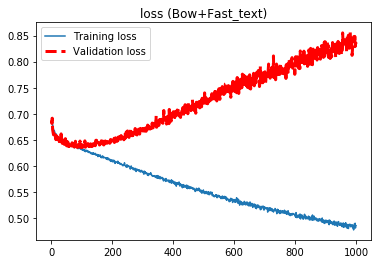

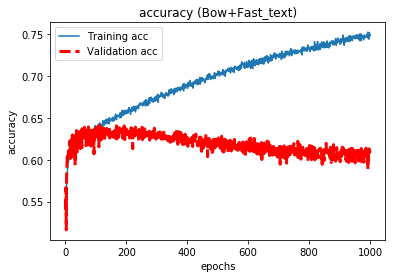

In [20]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss', linewidth=3)
plt.title('loss (Bow+Fast_text)')
plt.legend()
plt.savefig("Training and Validation loss (Bow+Fast_text).eps", format='eps', dpi=1200)

plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc,'r--', label='Validation acc', linewidth=3)
plt.title('accuracy (Bow+Fast_text)')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.savefig("Training and validation accuracy (Bow+Fast_text).eps", format='eps', dpi=1200)
plt.show()

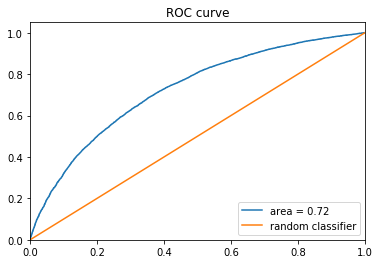

In [0]:
#Create ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
pred_probas = model.predict_proba(x_test_)[:,0]
fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], label="random classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.title("ROC curve")
plt.savefig("ROC curve (Bow+Fast_text).eps", format='eps', dpi=1200)
plt.show()

In [0]:
!ls

 adc.json
'Confusion Matrix (tf_idf).eps'
 model_fasttext.h5
 model_tf-idf.h5
'ROC curve (Bow+Fast_text).eps'
'ROC curve.eps'
'ROC curve (tf_idf).eps'
 sample_data
'Training and validation accuracy (Bow+Fast_text).eps'
'Training and validation accuracy (tf-df).eps'
'Training and Validation loss (Bow+Fast_text).eps'
'Training and Validation loss (tf-df).eps'
 wiki-news-300d-1M-subword.vec
 wiki-news-300d-1M-subword.vec.zip


In [0]:
files.download("Training and validation accuracy (Bow+Fast_text).eps")
files.download("Training and Validation loss (Bow+Fast_text).eps")
files.download("ROC curve (Bow+Fast_text).eps")

###Confusion matrix

We can visually check the confusion matrix to understand the distribution of misclassifications.

In [0]:
res=model.predict(x_test_)
res=res.reshape(1, -1)[0]
res_ = [int(np.round(x)) for x in res]

In [0]:
counter = np.count_nonzero(y_pred==y_test)
counter/len(y_test)

[]

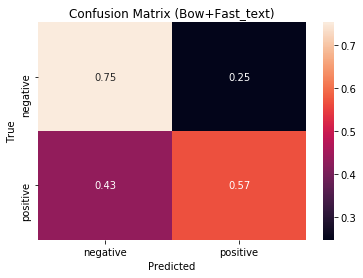

In [0]:
y_pred = np.round(model.predict(x_test_)); y_pred

LABELS = [
    "negative", "positive"
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(y_test, y_pred)
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True")
plt.title("Confusion Matrix (Bow+Fast_text)")
plt.savefig("Confusion Matrix (Bow+Fast_text).eps", format='eps', dpi=1200)
plt.plot()

In [0]:
files.download("Confusion Matrix (Bow+Fast_text).eps")

### Saving the entire model and save in the drive

In [0]:
# Save entire model to a HDF5 file
model.save('model_fasttext.h5')

In [0]:
!ls

'Confusion Matrix (tf_idf).eps'   sample_data
 model_tf-idf.h5		 'Training and validation accuracy (tf-df).eps'
'ROC curve.eps'			 'Training and Validation loss (tf-df).eps'
'ROC curve (tf_idf).eps'


In [0]:
files.download( "model_fasttext.h5" )

In [0]:
!ls

adc.json  sample_data			 wiki-news-300d-1M-subword.vec.zip
gdrive	  wiki-news-300d-1M-subword.vec


## TF_IDF 

In [0]:
%%time

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(tfidf_train.shape[1], ), activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.66):
      print("\nReached 90% val_acc so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(0.003), metrics=['accuracy'])

# fit network
model.fit(tfidf_train, train_df.sentiment, 
          epochs=100, 
          batch_size=64, verbose=2, 
          validation_split=0.2)#, callbacks=[monitor])


          
#           epochs=2000, 
#           batch_size=32, verbose=2, 
#           validation_split=0.2, callbacks=[monitor])

loss, acc = model.evaluate(tfidf_tst, test_df.sentiment, verbose=0)
print('Test Accuracy: %f' % (acc*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               10240512  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 10,766,337
Trainable params: 10,766,337
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/100
 - 5s - loss: 0.3315 - acc: 0.8641 - val_loss: 0.2648 - val_acc: 0.89

### Plots

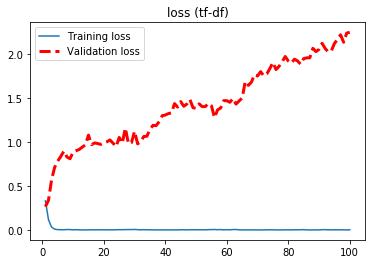

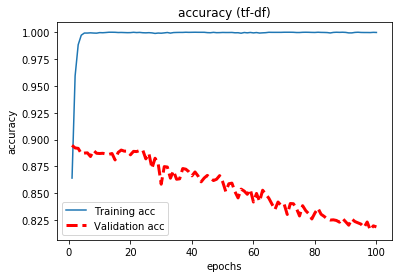

In [0]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, 'r--',label='Validation loss',  linewidth=3)
plt.title('loss (tf-df)')
plt.legend()
plt.savefig("Training and Validation loss (tf-df).eps", format='eps', dpi=1200)
plt.show()

plt.figure()
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc,'r--', label='Validation acc', linewidth=3)
plt.title('accuracy (tf-df)')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.savefig("Training and validation accuracy (tf-df).eps", format='eps', dpi=1200)
plt.show()

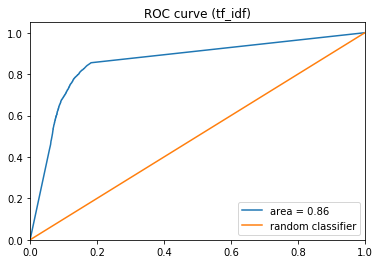

In [0]:
#Create ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
pred_probas = model.predict_proba(tfidf_tst)[:,0]
fpr,tpr,_ = roc_curve(test_df.sentiment, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], label="random classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.title("ROC curve (tf_idf)")
plt.savefig("ROC curve (tf_idf).eps", format='eps', dpi=1200)
plt.show()

In [0]:
model.predict(tfidf_tst[:,:])

array([[9.9999994e-01],
       [2.9802322e-08],
       [0.0000000e+00],
       ...,
       [0.0000000e+00],
       [3.5142303e-03],
       [0.0000000e+00]], dtype=float32)

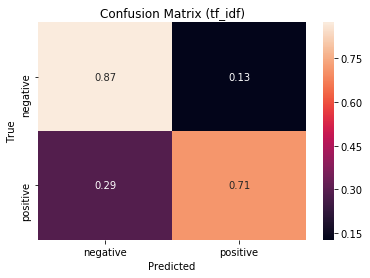

In [0]:
y_pred = np.round(model.predict(tfidf_tst))

LABELS = [
    "negative", "positive"
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(test_df.sentiment,
                           y_pred)
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.title("Confusion Matrix (tf_idf)")
plt.xlabel("Predicted");
plt.ylabel("True");
plt.savefig("Confusion Matrix (tf_idf).eps", format='eps', dpi=1200)
plt.show()

In [0]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [0]:
(0.95+0.28)/(0.95+0.28+0.049+0.72)

0.6153076538269134

In [0]:
# accuracy = accuracy_score(tfidf_tst, test_df.sentiment)
# print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
# precision = precision_score(tfidf_tst, test_df.sentiment)
# print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(tfidf_tst, test_df.sentiment)
print('Recall: %f' % recall)

In [0]:
!ls

'Confusion Matrix (tf_idf).eps'   sample_data
 model_tf-idf.h5		 'Training and validation accuracy (tf-df).eps'
'ROC curve.eps'			 'Training and Validation loss (tf-df).eps'
'ROC curve (tf_idf).eps'


In [0]:
# files.download('Training and validation accuracy (tf-df).eps')
# files.download("Training and Validation loss (tf-df).eps")
# files.download("ROC curve (tf_idf).eps")
files.download("Confusion Matrix (tf_idf).eps")

# files.download('model_tf-idf.h5')

# Small Example 

A small example for understanding of how Tokenize work

### Word level

In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
samples_essay= ['Salomon likes to learn new things. Djeff likes that too', 
            'Salomon also likes to learn Karateka']
sample_wiki = ["John likes to watch movies. Mary likes movies too.", 
               "John also likes to watch football games."]

sample_presentation =["That which we call a rose by any other name would smell as sweet.",
                     "Good night sweet prince.",
                     "Parting is such sweet sorrow."] 


tokenizer = Tokenizer()
tokenizer.fit_on_texts(samples_essay)
sequences = tokenizer.texts_to_sequences(samples_essay)

tf_results = tokenizer.texts_to_matrix(samples_essay, mode='freq')
tf_idf_results = tokenizer.texts_to_matrix(samples_essay, mode='tfidf')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11 unique tokens.


In [0]:
sequences

[[2, 1, 3, 4, 5, 6, 7, 1, 8, 9], [2, 10, 1, 3, 4, 11]]

In [0]:
tf=1/6;tf

0.16666666666666666

In [0]:
(tf)*np.log10(2/1)

0.050171665943996864

In [0]:
(1+np.log(1))*np.log(1+(2/(1+1)))

0.6931471805599453

In [0]:
tf_results

array([[0.        , 0.07142857, 0.07142857, 0.07142857, 0.07142857,
        0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
        0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.25      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25      , 0.25      , 0.25      , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.2       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.2       ,
        0.2       , 0.2       ]])

In [0]:
sequences
np.where()

[[2, 1, 3, 4, 5, 6, 7, 1, 8, 9], [2, 10, 1, 3, 4, 11]]

In [0]:
k = sequences[0][0]
k in sequences[1]

True

In [0]:
def idf(sequences, tf_results):
  tf_idf = np.zeros((len(sequences), tf_results.shape[1]))
  for j in range(tf_idf[0]):
    for i in range(1, tf_idf[1]):
      t
  return tf_idf

In [0]:
def tf_idf(sequences, tf_results):
  tf_idf = np.zeros((len(sequences), tf_results.shape[1]))
  for j in range(tf_idf[0]):
    for i in range(1, tf_idf[1]):
      t
  return tf_idf

tf_idf(sequences, tf_results)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
np.log10(3/1)

0.47712125471966244

In [0]:
tf_idf_results

array([[0.        , 0.55961579, 0.91629073, 0.91629073, 0.91629073,
        0.91629073, 0.91629073, 0.91629073, 0.91629073, 0.91629073,
        0.91629073, 0.91629073, 0.91629073, 0.91629073, 0.91629073,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.55961579, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.91629073, 0.91629073, 0.91629073, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.55961579, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.91629073, 0.91629073,
        0.91629073, 0.91629073]])

In [0]:
len(word_index)

21

In [0]:
word_index

{'a': 6,
 'any': 9,
 'as': 14,
 'by': 8,
 'call': 5,
 'good': 15,
 'is': 19,
 'name': 11,
 'night': 16,
 'other': 10,
 'parting': 18,
 'prince': 17,
 'rose': 7,
 'smell': 13,
 'sorrow': 21,
 'such': 20,
 'sweet': 1,
 'that': 2,
 'we': 4,
 'which': 3,
 'would': 12}

In [0]:
bag_of_word_results.shape

(2, 12)

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import string
import sys
import warnings
from collections import OrderedDict
from collections import defaultdict
from hashlib import md5
import json

import numpy as np
from six.moves import range
from six.moves import zip

In [0]:
num_words = len(word_index) + 1
x = np.zeros((len(sequences), num_words))
for i, seq in enumerate(sequences):
  if not seq:
    continue
  counts = defaultdict(int)
  for j in seq:
    if j >= num_words:
      continue
    counts[j] += 1
  for j, c in list(counts.items()):
#     x[i][j] = c / len(seq) # For term frequency
    tf = 1 + np.log(c)
#     idf = np.log(1 + self.document_count /
#                  (1 + self.index_docs.get(j, 0)))
    idf = np.log(1 + 3 /
                 (1 + 3))
    x[i][j] = tf * idf
    
x

array([[0.        , 0.55961579, 0.55961579, 0.55961579, 0.55961579,
        0.55961579, 0.55961579, 0.55961579, 0.55961579, 0.55961579,
        0.55961579, 0.55961579, 0.55961579, 0.55961579, 0.55961579,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.55961579, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.55961579, 0.55961579, 0.55961579, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.55961579, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.55961579, 0.55961579,
        0.55961579, 0.55961579]])

In [0]:
counts = defaultdict(int)
counts[12] += 1
counts

defaultdict(int, {12: 1})

In [0]:
        for i, seq in enumerate(sequences):
            if not seq:
                continue
            counts = defaultdict(int)
            for j in seq:
                if j >= num_words:
                    continue
                counts[j] += 1
            for j, c in list(counts.items()):
                if mode == 'count':
                    x[i][j] = c
                elif mode == 'freq':
                    x[i][j] = c / len(seq)
                elif mode == 'binary':
                    x[i][j] = 1
                elif mode == 'tfidf':
                    # Use weighting scheme 2 in
                    # https://en.wikipedia.org/wiki/Tf%E2%80%93idf
                    tf = 1 + np.log(c)
                    idf = np.log(1 + self.document_count /
                                 (1 + self.index_docs.get(j, 0)))
                    x[i][j] = tf * idf
                else:
                    raise ValueError('Unknown vectorization mode:', mode)
        return x

### Caracter level

In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 17 unique tokens.


In [0]:
sequences

[[2, 4, 3, 1, 9, 5, 2, 1, 10, 5, 2, 1, 6, 11, 1, 2, 4, 3, 1, 7, 5, 2, 8],
 [2,
  4,
  3,
  1,
  12,
  6,
  13,
  1,
  5,
  2,
  3,
  1,
  7,
  14,
  1,
  4,
  6,
  7,
  3,
  15,
  6,
  16,
  17,
  8]]

In [0]:
one_hot_results

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 1.]])

In [0]:
word_index

{' ': 1,
 't': 2,
 'e': 3,
 'h': 4,
 'a': 5,
 'o': 6,
 'm': 7,
 '.': 8,
 'c': 9,
 's': 10,
 'n': 11,
 'd': 12,
 'g': 13,
 'y': 14,
 'w': 15,
 'r': 16,
 'k': 17}

##  hashing trick

In [0]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
#         Hashes the word into a 
#         random integer index 
#         between 0 and 1,000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.


# <h2>About the Authors:</h2> 

<a href="https://salomonkabongo.wixsite.com/datascientist">Salomon Kabongo KABENAMUALU</a>, Master degree student at <a href="https://aims.ac.za/">the African Institute for mathematical SCiences (AIMS South Africa)</a> his research focused on the use machine learning technique in the field of Natural Language Processing.

References : <a href="https://machinelearningmastery.com/deep-learning-bag-of-words-model-sentiment-analysis/"> How to Develop a Deep Learning Bag-of-Words Model for Predicting Movie Review Sentiment</a>

Copyright &copy; 2019. This notebook and its source code are released under the terms of the <a href="https://www.apache.org/licenses/LICENSE-2.0">Apache License 2.0</a>.